Basic Convolution Neural Networks for Image Classification using Keras

# Step 1: Import Libraries
first, we need to import the necessary libraries. TensorFlow and Keras will be used to build and train our CNN model. We'll also use Matplotlib for visualizing the training process.

In [10]:
import tensorflow as tf
#tensorflow and tensorflow.keras: TensorFlow is a powerful library for deep learning. Keras, which is part of TensorFlow, provides a high-level API to build and train models easily.
#layers and models: These are used to define the layers and the architecture of our neural network.
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
#o_categorical: This function is used to convert class labels into a one-hot encoded format.
import matplotlib.pyplot as plt
#matplotlib.pyplot: This is used for plotting graphs to visualize the training and validation performance.

In [11]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

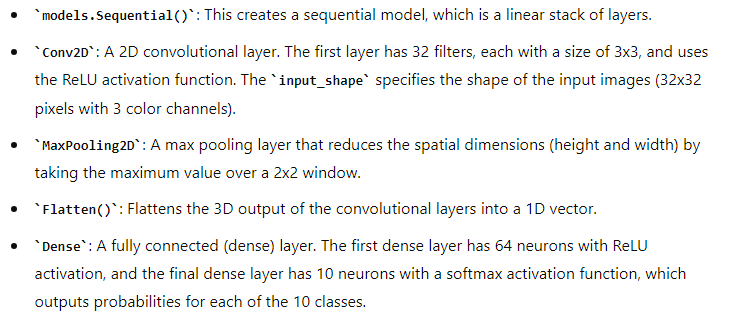

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Adam is a popular optimization algorithm that adjusts the learning rate during training.
#This is the loss function used for multi-class classification problems. It measures the difference between the predicted and actual class distributions.
#metrics=['accuracy']: We monitor the accuracy of the model during training and evaluation.

In [14]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5361 - accuracy: 0.4412 - val_loss: 1.3029 - val_accuracy: 0.5248
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1452 - accuracy: 0.5961 - val_loss: 1.0988 - val_accuracy: 0.6184
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9827 - accuracy: 0.6553 - val_loss: 0.9585 - val_accuracy: 0.6667
Epoch 4/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8749 - accuracy: 0.6944 - val_loss: 0.9053 - val_accuracy: 0.6827
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8013 - accuracy: 0.7200 - val_loss: 0.9022 - val_accuracy: 0.6880


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 4s - loss: 0.9022 - accuracy: 0.6880 - 4s/epoch - 13ms/step
Test accuracy: 0.6880000233650208


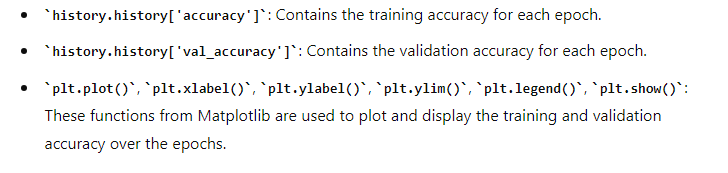

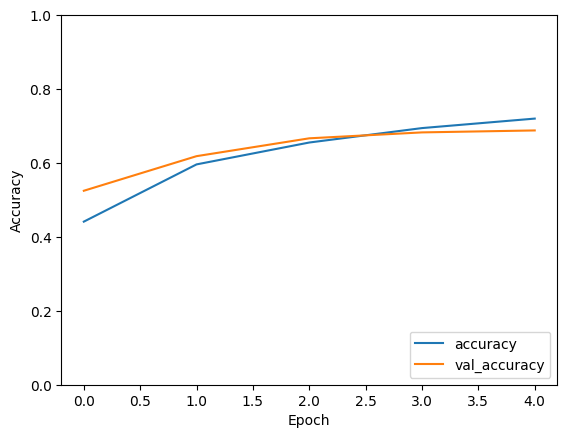

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()